In [1]:
import torch
from torch import nn
from tqdm import tqdm
import toml
os.chdir("..")

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from core.dl_framework.data import Dataset
from core.dl_framework.utils import read_config
config_file = read_config(toml.load("configs/default_train_config.toml"))

In [4]:
from core.dl_framework.data import data_pipeline
from pathlib import Path
import numpy as np
from torchvision import transforms
from sklearn.model_selection import train_test_split
train_data_path = "seg_train/seg_train"

# data_test = data_pipeline(train_data_path, config_file)


In [16]:
from pathlib import Path
from torchvision import transforms
from tqdm import tqdm
from PIL import Image
from time import time
train_data_path = "seg_train/seg_train"
data_path = Path(config_file["p_tmp_data_path"]) / Path(train_data_path)
transform = transforms.Resize((124, 124))
all_imgs = ([x for x in Path(data_path).rglob("*.jpg") if x.is_file()])
# y_classes = [y.name for y in Path(data_path).glob("*")]
# classes_to_label = dict(zip(y_classes, range(len(y_classes))))
# targets = np.array([classes_to_label[x.parent.name] for x in self.x])
transformed_imgs = []
pbar_imgs_list = tqdm(all_imgs, total=len(all_imgs), leave=True)

for img in pbar_imgs_list:
    transformed_imgs.append(transform(Image.open(img)))


100%|██████████| 14034/14034 [00:45<00:00, 310.39it/s]


In [15]:
len(transformed_imgs)

0

In [ ]:
numpy_arr = []
for i in data_test.train_dl.dataset.transformed_imgs:
    numpy_arr.append(i.numpy())
arr = np.array(numpy_arr).tostring()
arr.shape

Error: Canceled future for execute_request message before replies were done

In [26]:
np.load("/")

array([[[[6.09281733e-01, 8.67261529e-02, 8.23441940e-01],
         [6.50368446e-01, 6.63703251e-01, 8.54646399e-01],
         [9.04373246e-01, 7.52373653e-01, 2.21874170e-01],
         ...,
         [3.64829690e-01, 8.27097412e-01, 1.78575179e-02],
         [1.46930947e-01, 5.46118164e-04, 1.35271738e-01],
         [1.18343418e-02, 7.85461294e-01, 7.93192912e-01]],

        [[1.50174141e-02, 7.74307362e-01, 8.79308939e-01],
         [7.75734640e-02, 6.92055829e-02, 6.28276684e-02],
         [1.35585554e-01, 8.48816417e-01, 2.72112826e-02],
         ...,
         [5.02124050e-01, 5.69973902e-01, 6.41463957e-02],
         [9.19624116e-01, 9.84867401e-01, 8.17286059e-01],
         [9.79036117e-01, 6.43557499e-01, 5.26044621e-01]],

        [[9.10670630e-01, 3.14050172e-01, 7.11580567e-02],
         [1.93926102e-01, 1.90415417e-01, 3.23074313e-01],
         [4.52433025e-01, 3.21603407e-01, 4.21031264e-01],
         ...,
         [9.88259139e-01, 2.72729691e-01, 4.58689183e-01],
         [

In [22]:
bytes_arr = arr.tostring()

Error: Canceled future for execute_request message before replies were done

In [ ]:
pbar = tqdm(data_test.train_dl, total=len(data_test.train_dl))
for i, data_batch in enumerate(pbar):
    i

In [8]:
import h5py
from PIL import Image
save_path = "./tmp_files/train_imgs.hdf5"
data_path = Path(config_file["p_tmp_data_path"]) / Path(train_data_path)
imgs_file = [x for x in Path(data_path).rglob("*.jpg") if x.is_file()]
file_length = len([x for x in Path(data_path).rglob("*.jpg") if x.is_file()])
with h5py.File(save_path, "w", libver="latest") as f:
    dset = f.create_dataset("train_imgs", shape=(file_length, 124, 124, 3), 
                            dtype=np.float32, fillvalue=0, chunks=True, 
                            compression='gzip', compression_opts=9)
    pbar_imgs = tqdm(imgs_file, total=len(imgs_file))
    for idx, img in enumerate(pbar_imgs):
        resized_img = transforms.Resize((124, 124))(Image.open(img))
        dset[idx] = resized_img
    

  0%|          | 39/14034 [01:58<11:49:38,  3.04s/it]


KeyboardInterrupt: 

In [102]:
for img in imgs_file:
    resized_img = transforms.Resize(124)(Image.open(img))
    # test = Image.open(img)
    break

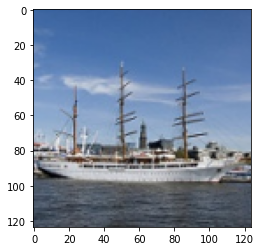

In [112]:
import matplotlib.pyplot as plt
np_img = np.array(resized_img)
# # np_img = np_img.reshape((3, 124, 124))
np_img = transforms.ToTensor()(np_img)
# np_img = np_img.numpy().reshape(124, 124, 3)*255
# Image.fromarray(np_img.astype(np.uint8))
# np_img.shape
# np_img
plt.imshow(np_img.permute(1, 2, 0))
# np_img.permute(2, 1, 0).shape

In [27]:
from PIL import Image
transform = [transforms.Resize(124), transforms.ToTensor()]
transformed_imgs = []
pbar_imgs_list = tqdm(imgs_list, total=len(imgs_list), leave=True)
for img in pbar_imgs_list:
    transformed_imgs.append(transforms.Compose(transform)(Image.open(img)))



100%|██████████| 14034/14034 [00:34<00:00, 404.41it/s]


In [36]:
import typing
class CustomDataset(Dataset):
    def __init__(self, data_path: typing.Union[str, Path], transform: list = None) -> None:
        self.data_path = data_path
        self.transform = transform
        self.x = sorted([x for x in Path(data_path).rglob("*.jpg") if x.is_file()])
        y_classes = [y.name for y in Path(data_path).glob("*")]
        self.classes_to_label = dict(zip(y_classes, range(len(y_classes))))
        self.targets = np.array([self.classes_to_label[x.parent.name] for x in self.x])
        self.file = h5py.File("./train_imgs.hdf5", "r")
        
    def __len__(self) -> int:
        return len(self.x)

    def __getitem__(self, idx: int) -> tuple:
        xs = self.file["train_imgs.hdf5"][idx]
        if self.transform:
            xs = transforms.Compose(self.transform)(xs)
        return x, self.targets[idx]

array([[[ 61., 103., 161.],
        [ 61., 103., 161.],
        [ 59., 101., 159.],
        ...,
        [ 64.,  97., 151.],
        [ 65.,  98., 152.],
        [ 65.,  98., 152.]],

       [[ 63., 104., 162.],
        [ 63., 104., 162.],
        [ 62., 103., 161.],
        ...,
        [ 65.,  98., 152.],
        [ 66.,  99., 153.],
        [ 66.,  99., 153.]],

       [[ 64., 104., 163.],
        [ 64., 104., 163.],
        [ 64., 104., 163.],
        ...,
        [ 67., 100., 154.],
        [ 67., 100., 154.],
        [ 67., 100., 154.]],

       ...,

       [[ 74.,  83.,  98.],
        [ 76.,  85., 100.],
        [ 81.,  90., 105.],
        ...,
        [ 65.,  71.,  83.],
        [ 71.,  77.,  89.],
        [ 73.,  79.,  91.]],

       [[ 68.,  77.,  92.],
        [ 70.,  79.,  94.],
        [ 70.,  79.,  94.],
        ...,
        [ 53.,  59.,  71.],
        [ 55.,  61.,  73.],
        [ 54.,  60.,  72.]],

       [[ 71.,  80.,  95.],
        [ 61.,  70.,  85.],
        [ 56.,  

In [69]:
def conv_output_size(w, k=3, p=2, s=1):
    return ((w - k + 2*p) / s + 1)

def conv_block(img_size, n_in, nh, kernel_size, stride, padding, max_kernel=2):
    modules = [
    nn.Conv2d(n_in, nh, kernel_size, stride, padding),
    nn.BatchNorm2d(nh),
    nn.ReLU(),
    nn.MaxPool2d(max_kernel)
    ]
    output_size = conv_output_size(img_size, k=kernel_size, p=padding, s=stride)
    output_size = conv_output_size(output_size, k=max_kernel, p=0, s=max_kernel)
    return modules, int(output_size)

class CustomModel(nn.Module):
    def __init__(self, n_in, n_out, nh, img_size, num_blocks, kernel_size=3, stride=1, padding=1):
        super(CustomModel, self).__init__()
        
        modules_list = []

        for n in range(num_blocks):
            modules, output_size = conv_block(img_size, n_in, nh, kernel_size, stride, padding)
            modules_list.extend(modules)
            
            img_size = output_size
            n_in = nh
            nh = 2*nh
        self.conv = nn.Sequential(*modules_list)
        output_size = output_size**2 * n_in

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(output_size, n_out)
        )
    
    def forward(self, x):
        x = self.conv(x)
        out = self.fc(x)
        return out
    
net = CustomModel(img.size(1), 6, 16, 124, 4)



Program before typechecking:
from IPython import get_ipython
import torch
from torch import nn
from tqdm import tqdm
pass
pass
pass
pass
import matplotlib.pyplot as plt


def plot_img(img):
    pass
def conv_output_size(w, k=3, p=2, s=1):
    return ((w - k + 2*p) / s + 1)

def conv_block(img_size, n_in, nh, kernel_size, stride, padding, max_kernel=2):
    modules = [
    nn.Conv2d(n_in, nh, kernel_size, stride, padding),
    nn.BatchNorm2d(nh),
    nn.ReLU(),
    nn.MaxPool2d(max_kernel)
    ]
    output_size = conv_output_size(img_size, k=kernel_size, p=padding, s=stride)
    output_size = conv_output_size(output_size, k=max_kernel, p=0, s=max_kernel)
    return modules, int(output_size)

class CustomModel(nn.Module):
    def __init__(self, n_in, n_out, nh, img_size, num_blocks, kernel_size=3, stride=1, padding=1):
        super(CustomModel, self).__init__()
        
        modules_list = []

        for n in range(num_blocks):
            modules, output_size = conv_block(img_size,

In [64]:
import matplotlib.pyplot as plt
def plot_img(img):
    plt.imshow(img.permute(1, 2, 0))

In [54]:
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
from torchvision import transforms
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, data_path, transform=[]):
        self.data_path = data_path
        self.transform = transform
        self.total_imgs = sorted([p for p in Path(data_path).rglob("*.jpg") if p.is_file()])
        classes = [p.name for p in Path(data_path).glob("*")]
        self.classes_to_label = dict(zip(classes, range(len(classes))))

    def __len__(self):
        return len(self.total_imgs)
    
    def __getitem__(self, idx):
        image = Image.open(self.total_imgs[idx])
        if self.transform:
            image = transforms.Compose(self.transform)(image)
        label = self.total_imgs[idx].parent.name
        class_label = self.classes_to_label[label]
        return image, class_label

transform = [transforms.Resize((124, 124)), transforms.ToTensor()]
data_path = "../tmp_files/seg_train/seg_train/"
train_ds = CustomDataset(data_path=data_path, transform=transform)


In [58]:
from sklearn.model_selection import train_test_split
val_split = 0.2
   
# train_indices, valid_indices = train_test_split(range(len(train_ds)), stratify=train_ds.)
train_ds[:20]


AttributeError: 'list' object has no attribute 'read'

In [126]:
def conv_output_size(w, k=3, p=2, s=1):
    return ((w - k + 2*p) / s + 1)
conv_output_size(124,3,1,1)
conv_output_size(124, 2, 0, 2)
62*62*16
# conv_output_size(1984, 1, 2)

61504

In [110]:
124*124*16

246016

In [72]:
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors
prime_factors(63504)


[2, 2, 2, 2, 3, 3, 3, 3, 7, 7]

In [81]:
7*7*3

147